In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Excercise 1. Logistic Regression

In [29]:
def load_data(file_name):
    data = np.array(pd.read_csv(file_name, header=None))
    np.random.shuffle(data)
    split_index = int(len(data)*0.8)
    X_train, y_train = data[0:split_index,0:-1], data[0:split_index,-1]
    X_test, y_test = data[split_index:,0:-1], data[split_index:,-1]
    return X_train, y_train, X_test, y_test

In [35]:
class LogisticRegression:
    def __init__(self, num_iter, learning_rate, loss='cross_entropy'):
        self.num_iter = num_iter
        self.lr = learning_rate
        self.loss_func = loss
        
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __cross_entropy(self, h, y):
        return -np.mean(y*np.log(h) + (1-y)*np.log(1-h))    
    
    def __squared_error(self, h, y):
        h = (h >= 0.5)
        return np.sum((h - y)**2)
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.loss = []
        for i in range(self.num_iter):
            z = np.dot(X, self.weights)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / len(y)
            self.weights = self.weights - self.lr * gradient
            
            if self.loss_func == 'cross_entropy':
                loss = self.__cross_entropy(h, y)
            elif self.loss_func == 'squared error':
                loss = self.__squared_error(h, y)
                
            self.loss.append(loss)
        return self
    
    def predict(self, X_test):
        return self.__sigmoid(np.dot(X_test, self.weights)) >= 0.5

In [36]:
X_train, y_train, X_test, y_test = load_data(file_name='spambase/spambase.data')

Log transform the data, to avoid 0 in the log expressions:

In [37]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

Accuracy: 92.29098805646036


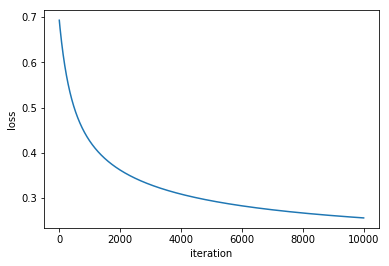

In [38]:
log_reg = LogisticRegression(10000, 0.01)
reg_fit = log_reg.fit(X_train, y_train)
plt.plot(reg_fit.loss)
plt.xlabel('iteration')
plt.ylabel('loss')
prediction = log_reg.predict(X_test)
accuracy = len(np.where(prediction == y_test)[0])/len(y_test)*100
print('Accuracy:', accuracy)

### a)  Loss function: squared error

[ True  True  True ...  True  True  True]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False False]
[ True False False ... False False

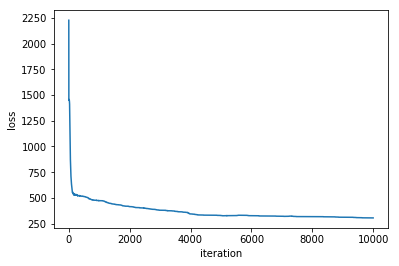

In [39]:
log_reg_sqr = LogisticRegression(10000, 0.01, loss='squared error')
reg_fit_sqr = log_reg_sqr.fit(X_train, y_train)
plt.plot(reg_fit_sqr.loss)
plt.xlabel('iteration')
plt.ylabel('loss')
prediction = log_reg.predict(X_test)
accuracy = len(np.where(prediction == y_test)[0])/len(y_test)*100
print('Accuracy:', accuracy)

The Squared Error is a good measurement of error in case of a linear model (e.g linear regression), logistic regression is a classification problem, with non-linear sigmoid function.
The graph of the cross entropy has a smooth decay, while the squared error just drops down.

### b)